In [ ]:
import os
from pathlib import Path
import cv2 as cv
import silda_util as su

In [ ]:
img_path = "data/SILDa/query/sensors/records_data/21_1.png"
assert Path(img_path).exists()

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_images(imgs):
    nrows=1
    ncols=len(imgs)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5,nrows*5+1), dpi= 120, squeeze=False)

    for j,img in enumerate(imgs):
        axs[0][j].imshow(img)
        #axs[j].set_axis_off()
        axs[0][j].set_aspect('equal')
        axs[0][j].plot(img.shape[1]/2, img.shape[0]/2, "r+")
    fig.tight_layout(h_pad=0.4, w_pad=0.3) 
    plt.show()

In [ ]:
img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)

In [ ]:
plot_images([img])

In [ ]:
des = su.cam.FisheyeFOV_Description(
    width = 1024,
    height = 1024,
    is_principle_point_abs=True,
    principle_point = (507.8974358974359,512),
    intrinsics = dict(
        fx = 217.294036,
        fy = 217.214703,
        w = -0.769113,
    )
)

In [29]:
des_out = su.cam.FisheyeDS_Description(
    width = 400,
    height = 400,
   # intrinsics= dict(f=161.27788920658563, a=0.025430288934561368, xi=-0.043727497380167235)
    #intrinsics= dict(f= 106.44628879375442, a = 0.6385566434969892, xi = -0.41822231768611295)
    intrinsics= dict(afov=202, a=0.5, xi=-0.2)
)

In [30]:
img_out = su.mappings.map_img(img, [des,des_out])[0]


In [31]:
des2 = su.load_descriptor("OPENCV")
img_out2 = su.mappings.map_img(img, [des2,des_out])[0]

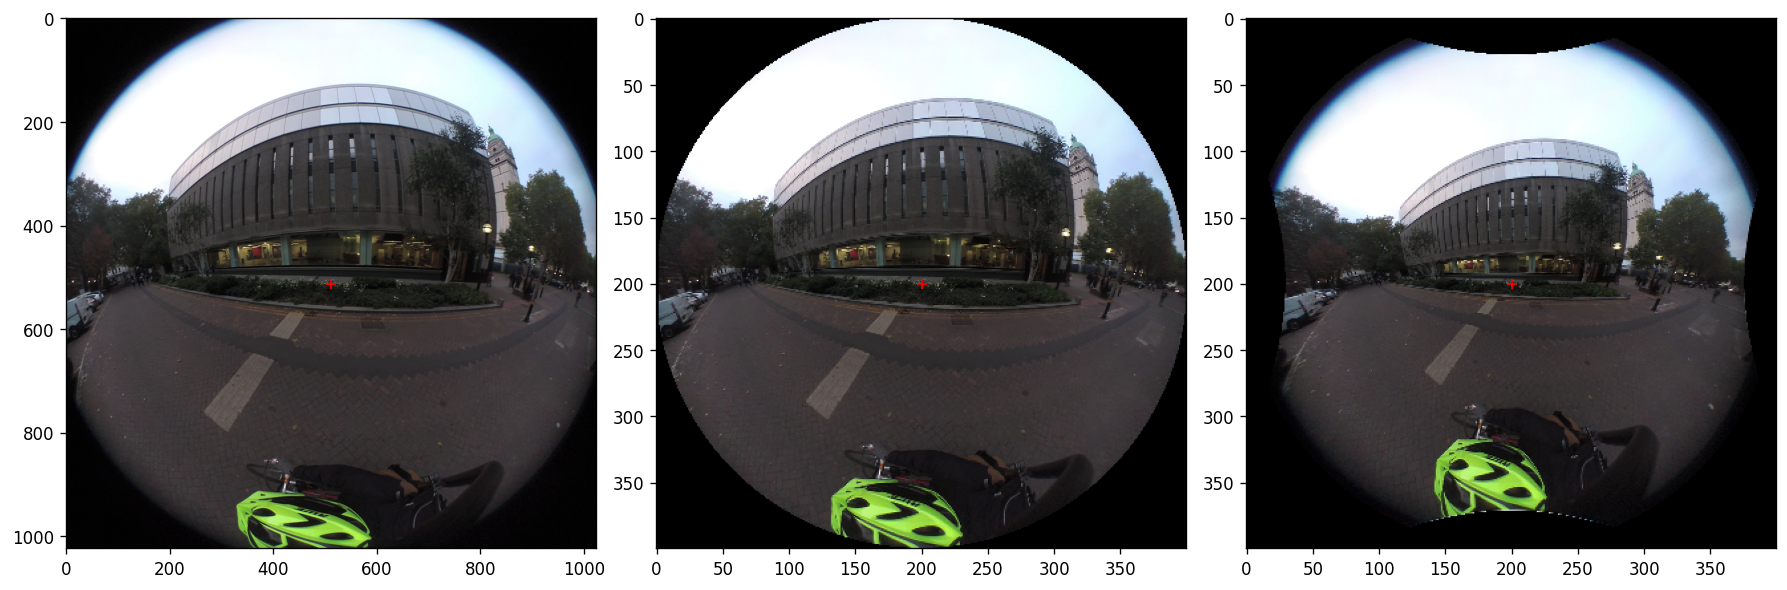

In [32]:
plot_images([img,img_out, img_out2])

In [ ]:
import pandas as pd
des_out2 = des_out.copy()
des_out2.a_ = 0
des_out2.xi_ = 0

data=pd.DataFrame([des_out.get_va_vector(), des_out2.get_va_vector()])

In [ ]:
data.T.plot(figsize=(20, 10), legend=True)

In [ ]:
des_out.get_va_vector()[-1]

In [ ]:
def apply_rots(img, img_des, des, rots):
    imgs = [ ]
    for rot in rots:
        des.extrinsic_rot = rot
        imgs += [su.mappings.map_img(img, [img_des,des])[0]]

    plot_images(imgs)

In [ ]:
import numpy as np

In [ ]:
des_out = su.cam.FisheyeDS_Description(
    width = 1024,
    height = 1024,
    intrinsics= dict(f=500, a=0.5, xi=0.5)
)

In [ ]:
rots = [[0,10,30],[0,30,0],[0,10,330]]

In [ ]:
apply_rots(img, des, des_out, rots)
np.degrees(des_out.get_va_vector()[-1]) * 2

In [ ]:
rots = [[0,0,30],[0,0,0],[0,0,330]]
apply_rots(img, des, des_out, rots)
np.degrees(des_out.get_va_vector()[-1]) * 2

In [ ]:
des.world2image([1,0,0])

In [ ]:
plot_images([img,img_out])

In [ ]:
import torch
import torchvision.transforms as T

In [ ]:
tens = T.ToTensor()(img_out)

In [ ]:
rotater = T.RandomRotation(degrees=(90))
rotated_imgs = [rotater(tens).numpy().transpose((1,2,0)) for _ in range(4)]
plot_images([img_out] + rotated_imgs)